# SVM - Classification Implementation

### Useing SVM to build and train a model on human cell records, and classify cells to whether the samples are benign (mild state) or malignant (evil state).

In [1]:
# Impoting necessary liberies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Data From CSV File
df = pd.read_csv('cell_samples.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.shape

(699, 11)

In [4]:
df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [5]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

### Distribution of the classes

In [6]:
benign_df = df[df['Class']==2][0:200]
malignant_df = df[df['Class']==2][0:200]

help(benign_df.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'pie' : pie plot
 |      - 'sc

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

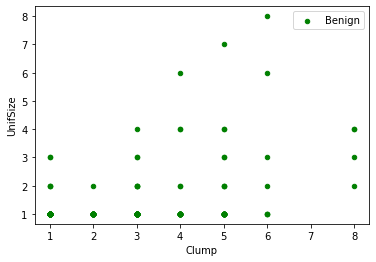

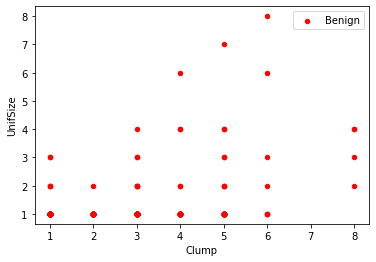

In [7]:
benign_df = df[df['Class']==2][0:200]
malignant_df = df[df['Class']==2][0:200]

axes = benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='green', label='Benign')

malignant_df.plot(kind='scatter',  x='Clump', y='UnifSize', color='red', label='Benign')

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

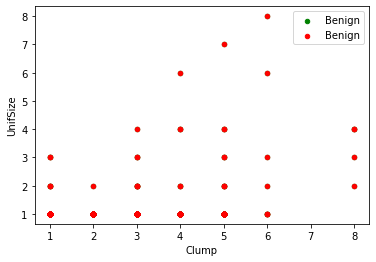

In [8]:
benign_df = df[df['Class']==2][0:200]
malignant_df = df[df['Class']==2][0:200]

axes = benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='green', label='Benign')

malignant_df.plot(kind='scatter',  x='Clump', y='UnifSize', color='red', label='Benign', ax=axes)

### Selection of unwanted columns

In [9]:
df.dtypes

df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

### Removing Unwanted columns

In [10]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [11]:
df.columns
feature_df = df[['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

# Independent variable
X = np.asarray(feature_df)

# Dependent variable
y =np.asarray(df['Class'])

X[0:5]

array([[1000025,       5,       1,       1,       1,       2,       1,
              3,       1,       1],
       [1002945,       5,       4,       4,       5,       7,      10,
              3,       2,       1],
       [1015425,       3,       1,       1,       1,       2,       2,
              3,       1,       1],
       [1016277,       6,       8,       8,       1,       3,       4,
              3,       7,       1],
       [1017023,       4,       1,       1,       3,       2,       1,
              3,       1,       1]])

In [12]:
df.columns
feature_df = df[['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

# Independent variable
X = np.asarray(feature_df)

# Dependent variable
y =np.asarray(df['Class'])

y[0:5]

array([2, 2, 2, 2, 2])

###  Dividing data as Train/Test dataset

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train.shape

# 546 x 10
X_train.shape

# 546 x 1
y_train.shape

#137 x 10
X_test.shape

#137 x 1
y_test.shape

(137,)

### Modeling SVM with Scikit-learn

In [22]:
from sklearn import svm

classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

### Evaluation Results


In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       0.69      0.98      0.81        90
           4       0.78      0.15      0.25        47

    accuracy                           0.69       137
   macro avg       0.73      0.56      0.53       137
weighted avg       0.72      0.69      0.62       137

